In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install category_encoders

In [3]:
df = pd.read_csv("/Users/yuktamuthreja/Library/CloudStorage/OneDrive-IndianaUniversity/AML Notes/Assignment 1/happiness_data (1).csv")

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## Part A - Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [5]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


#### How much data is present?
###### 1949 Rows and 11 Columns

In [6]:
df.shape

(1949, 11)

In [7]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

#### What attributes/features are continuous valued?

*   Everything except "Country name" and "year" is continuous valued.
*   Country Name is a categorical attribute
*   "year" is a Discrete attribute

#### Which attributes are categorical?

*   Country Name is a categorical attribute

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


#### Missing values

In [9]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

We are dropping the rows which contain Null or NaN because we do not have enough context on the data and any assumption for replacing those could introduce bias in the data. (Part B - special treatment for missing values)

In [10]:
## dropping nan values and rows
df.dropna(how="any", axis = 0, inplace = True)

In [11]:
## removing year column as mentioned by the question

df.drop(columns = ["year"], errors = "ignore", inplace = True)

In [12]:
df_numerical = df.select_dtypes(include=np.number)

In [13]:
df_numerical.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


## Part B - Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

#### Statistical distribution of numerical columns

In [14]:
df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.00000,1708.000000
mean,5.446680,9.321709,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446
std,1.136592,1.158344,0.121638,7.687011,0.142846,0.162103,0.186028,0.10819,0.083083
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000
25%,4.595000,8.394000,0.741000,58.175000,0.644000,-0.111250,0.697000,0.62300,0.208000
50%,5.364000,9.456500,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000
75%,6.259000,10.272000,0.908000,68.685000,0.852000,0.089000,0.875000,0.80125,0.319250
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000


In [15]:
## Target encoding Categorical column Country name
import category_encoders as ce

# Initialize and fit the TargetEncoder
encoder = ce.TargetEncoder(cols=['Country name'])
encoder.fit(df['Country name'], df['Life Ladder'])

# Transform the 'Category' column
df['Country name encoded'] = encoder.transform(df['Country name'])

We are target encoding the Country name variable because label encoding would give it an irrelevant inherent order and one hot encoding would introduce far too many features in the feature space. Target encoding calculates the grouped mean of each unique value in the column and encodes it using the mean values.

#### Histogram visualisation for data distribution of attribute

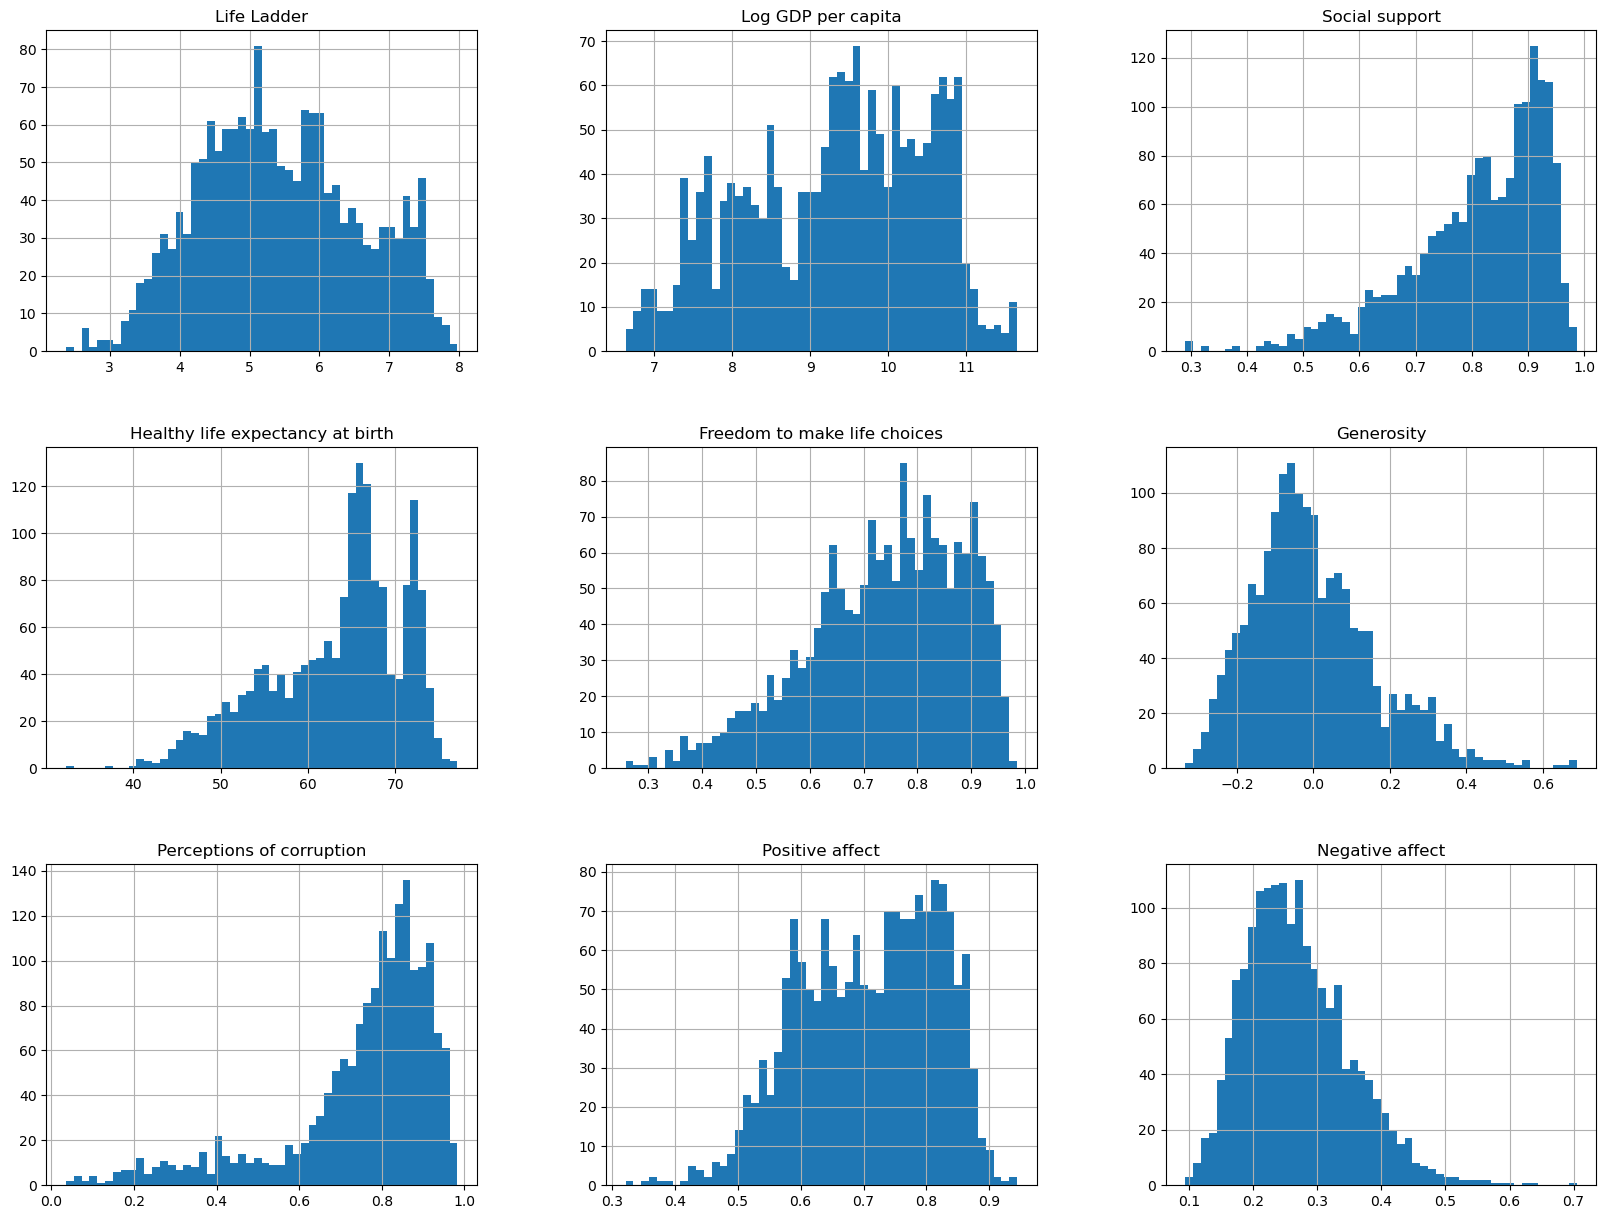

In [16]:
df_numerical.hist(bins=50, figsize=(20,15))
plt.show()

Special Treatment - Because of skewed distributions (as we can see below), it is best to apply a feature scaling method such as Normalization or Standardization.

We have also dropped rows containing missing values.

There are some outliers in each attribute but we will keep them because they might contribute in our prediction of life ladder.

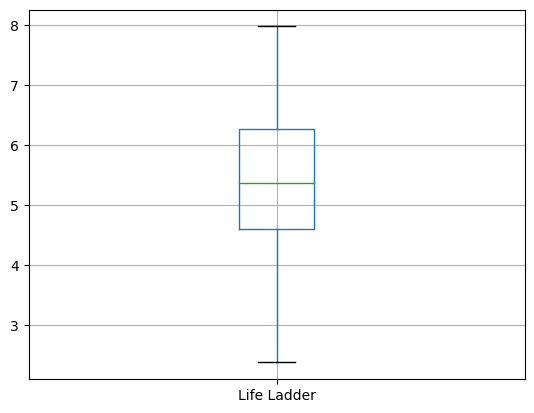

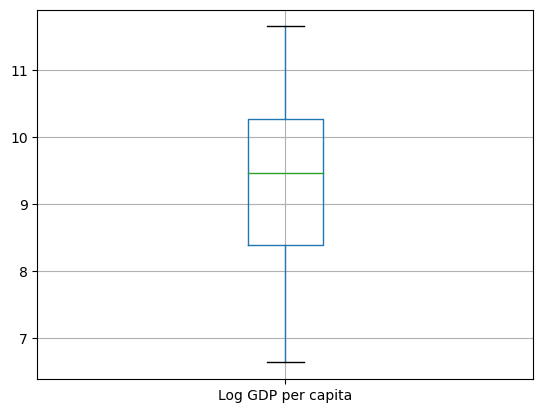

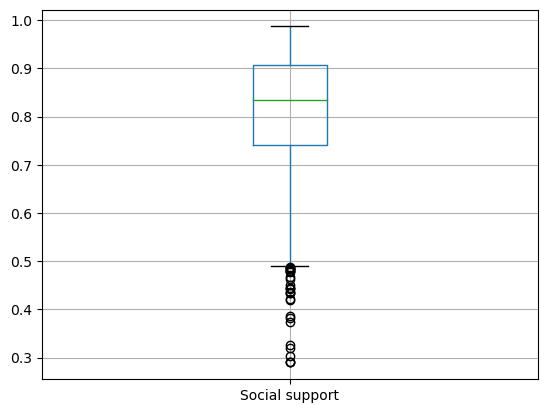

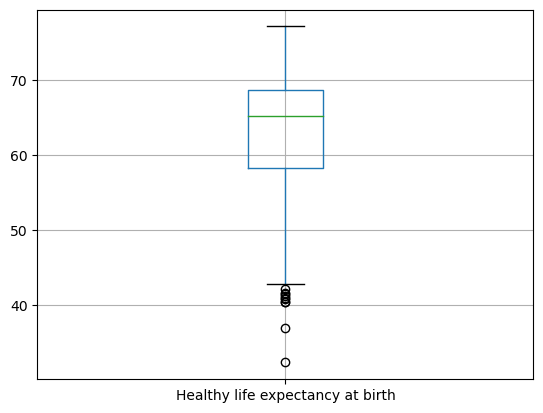

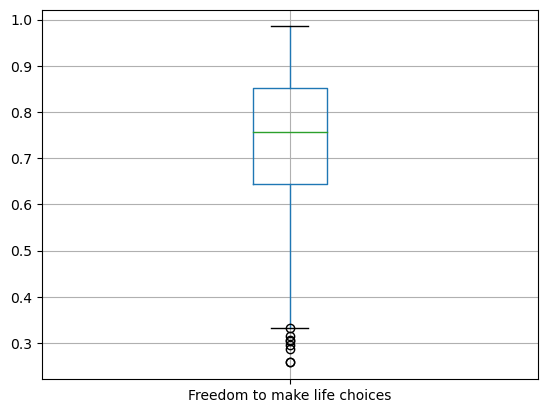

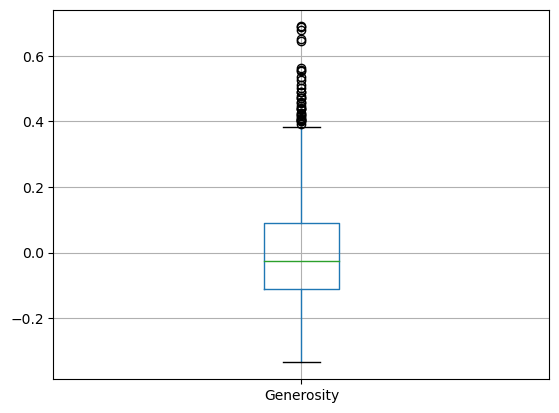

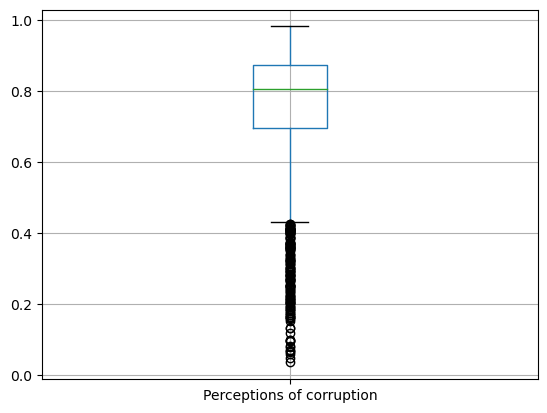

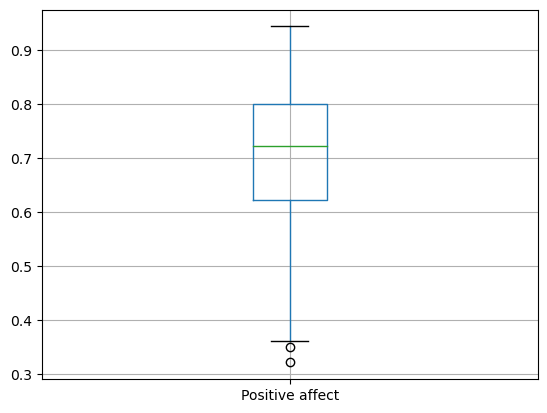

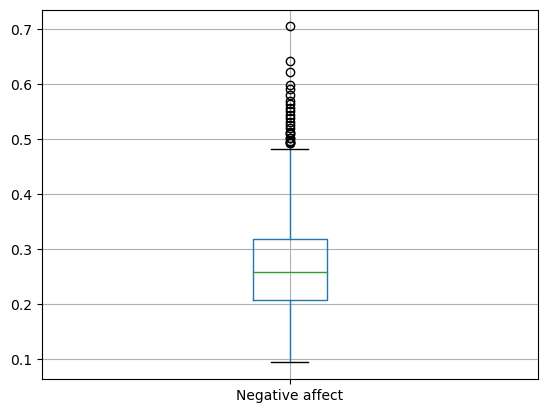

In [17]:
## boxplots
for column in df_numerical:
    plt.figure()
    df_numerical.boxplot([column])

## Part C - Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [18]:
df_numerical.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.792848,0.713211,0.754697,0.525089,0.182758,-0.448157,0.533092,-0.300466
Log GDP per capita,0.792848,1.000000,0.705972,0.860345,0.353182,-0.024565,-0.343468,0.296473,-0.224806
Social support,0.713211,0.705972,1.000000,0.617446,0.411719,0.056131,-0.226855,0.449969,-0.415358
Healthy life expectancy at birth,0.754697,0.860345,0.617446,1.000000,0.384829,0.018188,-0.334990,0.318886,-0.143014
Freedom to make life choices,0.525089,0.353182,0.411719,0.384829,1.000000,0.326313,-0.488072,0.611673,-0.267349
Generosity,0.182758,-0.024565,0.056131,0.018188,0.326313,1.000000,-0.288467,0.371530,-0.094401
Perceptions of corruption,-0.448157,-0.343468,-0.226855,-0.334990,-0.488072,-0.288467,1.000000,-0.301383,0.276518
Positive affect,0.533092,0.296473,0.449969,0.318886,0.611673,0.371530,-0.301383,1.000000,-0.360361
Negative affect,-0.300466,-0.224806,-0.415358,-0.143014,-0.267349,-0.094401,0.276518,-0.360361,1.000000


<Axes: >

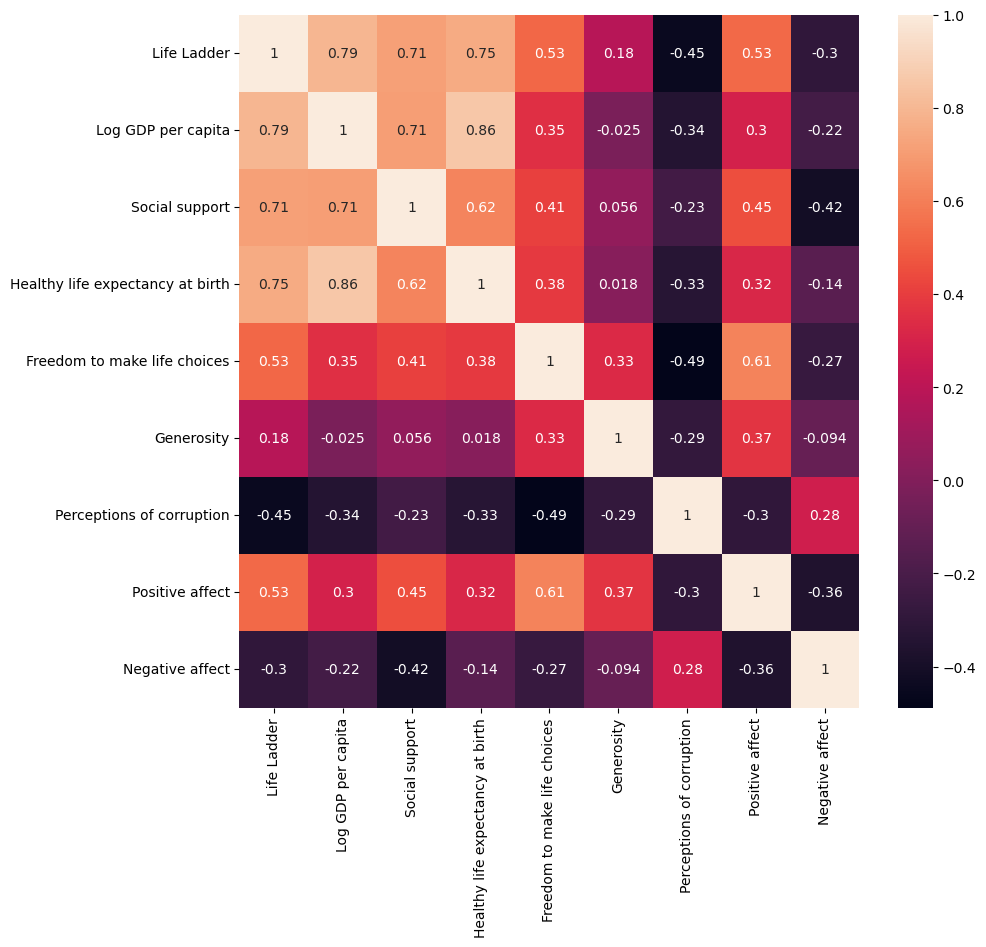

In [19]:
fig,ax=plt.subplots(figsize=(10,9))
sns.heatmap(df_numerical.corr(),annot=True)

From the PCC table and the heatmap, we can observe that our target - life ladder is highly positively correlated with Country encoded, healthy life expectancy at birth, social support, log GDP per capita.

Life Ladder is poorly and negatively correlated with negative effect.  

It has a moderate correlation with positive effect (positively), fredom to make life choices (positively), and perceptions of corruption (negatively).

Hence, we have good predictors and we do not need to perform any further feature engineering.

In [20]:
df_label = df["Life Ladder"]
df_attributes = df.drop(columns = ["Life Ladder"])

In [21]:
df_label

0       3.724
1       4.402
2       4.758
3       3.832
4       3.783
        ...  
1944    3.735
1945    3.638
1946    3.616
1947    2.694
1948    3.160
Name: Life Ladder, Length: 1708, dtype: float64

In [22]:
df_attributes

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country name encoded
0,Afghanistan,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,4.872509
1,Afghanistan,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,4.872509
2,Afghanistan,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,4.872509
3,Afghanistan,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,4.872509
4,Afghanistan,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,4.872509
...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,4.856176
1945,Zimbabwe,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,4.856176
1946,Zimbabwe,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,4.856176
1947,Zimbabwe,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,4.856176


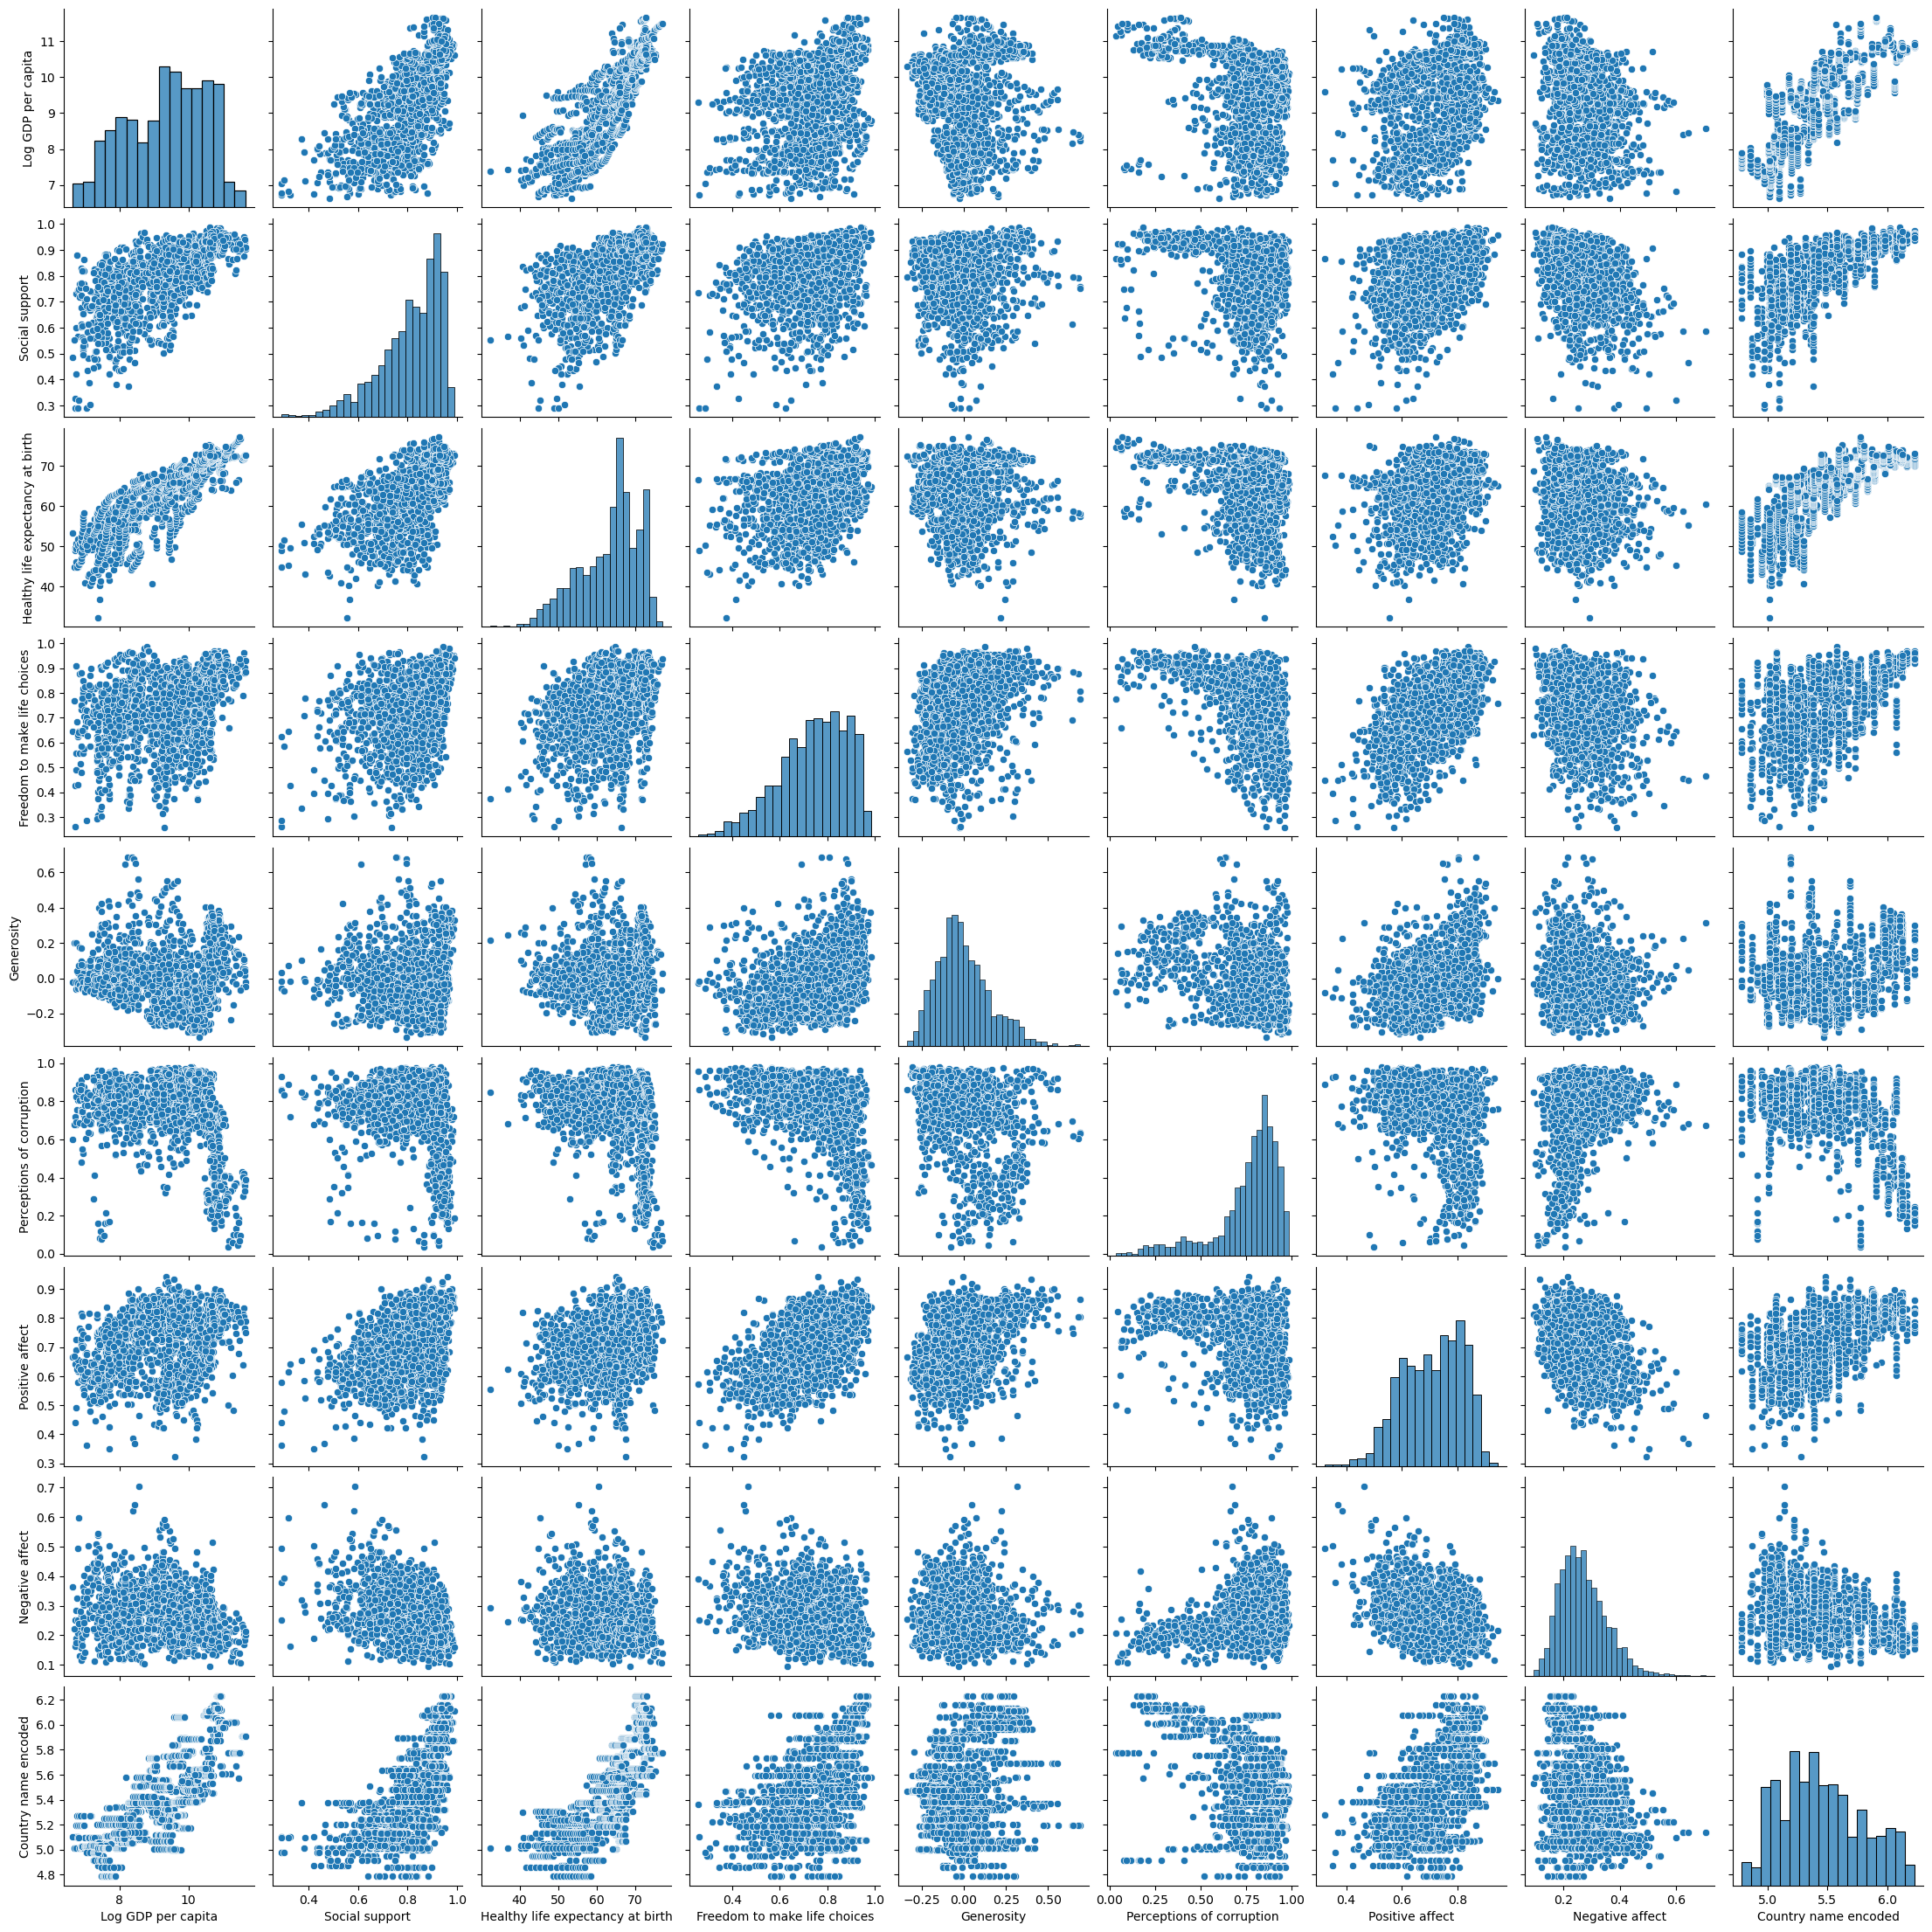

In [23]:
sns.pairplot(df_attributes)

In [24]:
df_wo_countryname = df.drop(['Country name'], axis=1)
for colname in df_attributes:
  sns.scatterplot(data=df_wo_countryname, x="Life Ladder", y=colname)
  plt.show()

ValueError: Could not interpret value `Country name` for parameter `y`

Looking at the scatter plots of attributes against the target (life ladder) we can further confirm about their correlations and predictive power.

The linearity is evident.

## Part D - Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [ ]:
df_attributes.drop(columns = ["Country name"], inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## We use train_test_split with parameter shuffle set to True and test_size as 0.2 in order to randomly select 20% of data as our test set and conversely 80% as train
X_train, X_test, y_train, y_test = train_test_split(df_attributes, df_label, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
X_train_numerical = X_train.select_dtypes(include=np.number)
X_test_numerical = X_test.select_dtypes(include=np.number)

In [ ]:
for colname in df_attributes.columns:
  plt.subplot(111)
  sns.histplot(data=X_train_numerical,x=colname)

  plt.subplot(111)
  sns.histplot(data=X_test_numerical,x=colname)

  plt.show()

#### As we can see, the distribution (via histograms) for our test set and train set follow similar patterns and hence we can verify that we have randomly picked a representative train and test set

Let us also normalize our data before feeding it into the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## Part E - Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=4)
lin_reg = LinearRegression()
# Create a list to store the performance metrics (e.g., Mean Squared Error) for each iteration
performance_metrics = []

for train_index, test_index in kf.split(X_train):
  X_train_kFold, X_test_kFold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
  y_train_kFold, y_test_kFold = y_train.iloc[train_index], y_train.iloc[test_index]


  # Fit the linear regression model on the training data
  lin_reg.fit(X_train_kFold, y_train_kFold)

  # Make predictions on the test data
  y_pred_kFold = lin_reg.predict(X_test_kFold)

  # Calculate the Mean Squared Error for this iteration
  mse = mean_squared_error(y_test_kFold, y_pred_kFold)

  # Store the performance metric
  performance_metrics.append(mse)

# Calculate the average performance metric across all iterations
average_performance = np.mean(performance_metrics)

In [ ]:
lin_reg.predict(X_test)

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Define a list of alpha values to try
alphas = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]

# Initialize empty lists to store the MSE values
lasso_mse_values = []
ridge_mse_values = []

for alpha in alphas:
    lasso_mse_fold = []
    ridge_mse_fold = []

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Create Lasso and Ridge models with the current alpha
        lasso_reg = Lasso(alpha=alpha)
        ridge_reg = Ridge(alpha=alpha)

        # Fit the Lasso model
        lasso_reg.fit(X_train_fold, y_train_fold)

        # Make predictions with the trained Lasso model
        lasso_predictions = lasso_reg.predict(X_test_fold)

        # Calculate MSE for Lasso
        lasso_mse = mean_squared_error(y_test_fold, lasso_predictions)
        lasso_mse_fold.append(lasso_mse)

        # Fit the Ridge model
        ridge_reg.fit(X_train_fold, y_train_fold)

        # Make predictions with the trained Ridge model
        ridge_predictions = ridge_reg.predict(X_test_fold)

        # Calculate MSE for Ridge
        ridge_mse = mean_squared_error(y_test_fold, ridge_predictions)
        ridge_mse_fold.append(ridge_mse)

    # Calculate the mean MSE across the four folds for each alpha
    lasso_mse_values.append(np.mean(lasso_mse_fold))
    ridge_mse_values.append(np.mean(ridge_mse_fold))

    # Print the MSE values for each alpha
    print(f"Alpha = {alpha}")
    print("Lasso Regression Mean CV MSE:", np.mean(lasso_mse_fold))
    print("Ridge Regression Mean CV MSE:", np.mean(ridge_mse_fold))
    print("===")

# Create individual plots for each regularization technique
plt.figure(figsize=(12, 6))

# Lasso Regression Plot
plt.subplot(131)
plt.semilogx(alphas, lasso_mse_values, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression')
plt.grid(True)

# Ridge Regression Plot
plt.subplot(132)
plt.semilogx(alphas, ridge_mse_values, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

warnings.resetwarnings()

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

warnings.filterwarnings("ignore")

# Define the number of folds (k)
k = 4

# Create lists of alpha (regularization strength) and l1_ratio (L1 mixing parameter)
alpha_list = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
l1_ratio_list = [0.1, 0.2, 0.4, 0.6]  # Different L1 ratios for Elastic Net

alpha_l1_list = []  # Store alpha and l1_ratio combinations
elastic_mse_vals = []  # Store Elastic Net MSE values

for l1_ratio in l1_ratio_list:
    for alpha in alpha_list:
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=200, random_state=42)

        # Initialize KFold cross-validator
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        fold_training_losses = []  # Store training losses for each fold
        fold_validation_losses = []  # Store validation losses for each fold

        for train_index, test_index in kf.split(X_train):  # You should replace X_train with your actual training data
            X_train_fold, X_test_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            # Fit the Elastic Net model
            elastic_net_model.fit(X_train_fold, y_train_fold)

            # Predict on the training data
            y_train_pred = elastic_net_model.predict(X_train_fold)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss = mean_squared_error(y_train_fold, y_train_pred)
            fold_training_losses.append(train_loss)

            # Predict on the validation data
            y_val_pred = elastic_net_model.predict(X_test_fold)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss = mean_squared_error(y_test_fold, y_val_pred)
            fold_validation_losses.append(val_loss)

        # Calculate the mean training and validation loss across folds for this alpha
        mean_training_loss = np.mean(fold_training_losses)
        mean_validation_loss = np.mean(fold_validation_losses)  # Fix this line

        alpha_l1_list.append((alpha, l1_ratio))
        elastic_mse_vals.append(mean_validation_loss)


# Plot training and validation loss as a function of alpha
plt.figure(figsize=(8, 5))
plt.plot(range(len(alpha_l1_list)), elastic_mse_vals, marker='o')
plt.xticks(range(len(alpha_l1_list)), [f"Alpha: {alpha}, L1 Ratio: {l1_ratio}" for alpha, l1_ratio in alpha_l1_list], rotation=90)
plt.xlabel('Alpha and L1 Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Net - Mean Squared Error vs. Alpha and L1 Ratio')
plt.grid()
plt.show()

warnings.resetwarnings()

In [ ]:
# As asked in the question, we would be running a four-fold valiadation, hence define the number of folds (k)
k = 4

# Storing the theta values for each fold
theta_values = []

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the MSE values for each fold
mse_values = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Calculating the coefficients using the normal equation
    X_transpose = np.transpose(X_train_fold)
    X_transpose_X = np.dot(X_transpose, X_train_fold)
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_y = np.dot(X_transpose, y_train_fold)
    theta = np.dot(X_transpose_X_inv, X_transpose_y)

    # Append the theta values for this fold to the list
    theta_values.append(theta)

    # Make predictions using the calculated theta values
    y_val_pred = np.dot(X_val_fold, theta)

    # Calculate and append the MSE for this fold
    mse_fold = mean_squared_error(y_val_fold, y_val_pred)
    mse_values.append(mse_fold)

# Calculate the average coefficients (theta) across all folds
average_theta = np.mean(theta_values, axis=0)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_values)

print("Average Coefficients (theta) across all folds:", average_theta)
print("Average MSE across all folds:",average_mse)

In [ ]:
## Predict / Plot

In [ ]:
# Inside the minibatch_gradient_descent function
def minibatch_gradient_descent(X, y, theta, lr, n_iter, batch_size, gradient_clip_threshold):
    cost_history = []
    for _ in range(n_iter):
        indices = np.random.choice(len(X), batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y_batch = y[indices].reshape(-1, 1)  # Reshape y_batch to (batch_size, 1)
        gradient = (1 / batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)

        # Clip gradients to prevent extreme updates
        gradient = np.clip(gradient, -gradient_clip_threshold, gradient_clip_threshold)

        theta -= lr * gradient
        cost = np.mean((X.dot(theta) - y) ** 2)
        cost_history.append(cost)
    return theta, cost_history

In [ ]:
X_train_array = X_train.values
y_train_array = y_train.values

In [ ]:
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

batch_sizes = [5,10,20,50,100]
for batch_size in batch_sizes:
  print("********************************************************")
  print(f"The following graphs are for batch size: {batch_size}")
  print("********************************************************")
  i = 1
  for train_index, val_index in kf.split(X_train_array):
      X_train_fold, X_val_fold = X_train_array[train_index], X_train_array[val_index]
      y_train_fold, y_val_fold = y_train_array[train_index], y_train_array[val_index]

      # Add bias column to fold data
      X_train_fold = np.c_[np.ones((len(X_train_fold), 1)), X_train_fold]
      X_val_fold = np.c_[np.ones((len(X_val_fold), 1)), X_val_fold]

      lr = 0.01
      n_iter = 300
      batch_size = 20
      theta = np.random.randn(10, 1)

      # Train the model using minibatch gradient descent with gradient clipping
      theta, cost_history = minibatch_gradient_descent(X_train_fold, y_train_fold, theta, lr, n_iter, batch_size, gradient_clip_threshold)

      print('Predictions for fold:', i)
      print('Intercept value:', theta[0, 0], '\nWeight values:', theta[1:])

      # Use the validation data and mean square error to evaluate performance
      N = len(y_val_fold)
      y_hat = np.dot(X_val_fold, theta)
      mse_val = (1 / N) * (np.sum(np.square(y_hat - y_val_fold)))
      print('Mean Square Error:', round(mse_val, 3), '\n')

      fig, ax = plt.subplots(figsize=(12, 4))
      plt.title('Fold: ' + str(i))
      ax.set_ylabel('Cost')
      ax.set_xlabel('Iterations')
      _ = ax.plot(range(n_iter), cost_history, 'b.')
      plt.show()

      i += 1

In [ ]:
# Running SGD Regression and plotting the training and validation loss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Create the SGDRegressor model with appropriate hyperparameters
alphaList = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
for alpha in alphaList:
  sgd_model = SGDRegressor(loss='squared_error', alpha=alpha, max_iter=1000, random_state=42, penalty="l2")

  # Initialize lists to store training and validation loss
  training_loss = []
  validation_loss = []

  # Number of training iterations
  n_iterations = 1000

  # Early stopping parameters
  early_stopping_rounds = 10  # Number of iterations with no improvement to wait before stopping
  best_val_loss = float('inf')  # Initialize the best validation loss to positive infinity
  no_improvement_count = 0  # Initialize the count of iterations with no improvement

  for iteration in range(n_iterations):
      # Fit the model for one iteration (one pass through the training data)
      sgd_model.partial_fit(X_train, y_train)

      # Predict on the training data
      y_train_pred = sgd_model.predict(X_train)

      # Calculate training loss (Mean Squared Error) and append to the list
      train_loss = mean_squared_error(y_train, y_train_pred)
      training_loss.append(train_loss)

      # Predict on the validation data
      y_val_pred = sgd_model.predict(X_test)

      # Calculate validation loss (Mean Squared Error) and append to the list
      val_loss = mean_squared_error(y_test, y_val_pred)
      validation_loss.append(val_loss)

      # Check for early stopping
      if val_loss < best_val_loss:
          best_val_loss = val_loss
          no_improvement_count = 0
      else:
          no_improvement_count += 1

      if no_improvement_count >= early_stopping_rounds:
          print(f"Early stopping at iteration {iteration + 1} due to no improvement in validation loss.")
          break

      # Plot training and validation loss as a function of training iteration
  plt.figure(figsize=(8, 5))
  plt.plot(range(1, iteration + 2), training_loss, label='Training Loss', marker='o')
  plt.plot(range(1, iteration + 2), validation_loss, label='Validation Loss', marker='x')
  plt.xlabel('Training Iteration')
  plt.ylabel('Mean Squared Error')
  plt.title(f'Training and Validation Loss vs. Training Iteration for alpha: {alpha}:')
  plt.legend()
  plt.grid()
  plt.show()

  # Final model evaluation
  y_pred_sgd = sgd_model.predict(X_test)
  final_mse = mean_squared_error(y_test, y_pred_sgd)
  print(f"Final Mean Squared Error (SGD) for alpha: {alpha}:", final_mse)


In [ ]:
#Amended code to calculate the Ridge, Lasso and Elastic Net
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store performance metrics
model_performance = pd.DataFrame(columns=('Model', 'penalty', 'MSE','R2-sq err'))
model_r2 = {}

# Regularization penalties to try
penalties = [0.1, 0, 10, 100]

# Define the maximum number of iterations for each model
max_iterations = 1000

# Create a dictionary to store model names for reference
model_names = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet()
}

# Iterate through different penalty terms for Ridge, Lasso, and Elastic Net
for penalty in penalties:
    # Ridge
    ridge_model = Ridge(alpha=penalty, max_iter=max_iterations)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    model_performance = model_performance.append({'Model':'Ridge','penalty': f'alpha = {penalty}','MSE': mse_ridge, 'R2-sq err': r2_ridge}, ignore_index=True)

    # Lasso
    lasso_model = Lasso(alpha=penalty, max_iter=max_iterations)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    model_performance = model_performance.append({'Model':'Lasso','penalty': f'alpha = {penalty}','MSE': mse_lasso, 'R2-sq err': r2_lasso}, ignore_index=True)

    # Elastic Net
    elastic_net_model = ElasticNet(alpha=penalty, max_iter=max_iterations)
    elastic_net_model.fit(X_train, y_train)
    y_pred_elastic_net = elastic_net_model.predict(X_test)
    mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
    r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
    model_performance = model_performance.append({'Model':'Elastic Net','penalty': f'alpha = {penalty}','MSE': mse_elastic_net, 'R2-sq err': r2_elastic_net}, ignore_index=True)

print(model_performance)

# Plot the MSE values for different models
for m in model_names.keys():
    plt.figure(figsize=(5, 5))
    plt.bar(model_performance[model_performance['Model'] == m]['penalty'], model_performance[model_performance['Model'] == m]['MSE'],width = 0.4)
    plt.xlabel(m)
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('MSE for Different Regularization and SGD Models')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the hyperparameters to tune
batch_sizes = [1, 8, 16, 32, 64, 128]
learning_rates = [0.01, 0.1]

results = []

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Create and train the linear regression model with specified hyperparameters
        model = LinearRegression()

        # Assuming you want to set the learning rate (eta0) for the model
        model_eta0=learning_rate

        # Train the model using the current batch size
        model.fit(X_train, y_train,learning_rate)

        # Evaluate the model on the test data
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results.append((batch_size, learning_rate, mse))

print(results)
# Find the best combination of hyperparameters based on the lowest RMSE
best_result = min(results, key=lambda x: x[2])
best_batch_size, best_learning_rate, best_rmse = best_result

print(f"Best Batch Size: {best_batch_size}")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Lowest RMSE: {best_rmse}")


Describing the impact for Linear Regression

SGD vs OLS

One of the characteristics of SGD is sensitive to feature scaling. This has been displayed in our regression model wherein while comparing the MSE values between the OLS regression and SGD, we notice that MSE derived from SGD is similar to the MSE value derived from OLS.

Ridge vs Lasso vs Elastic Net

  - Lasso can be best used when the dataset has features with poor predictive power. While ridge regression is useful for the grouping effect, in which colinear features can be selected together.
  - in our model, we can identify that ridge regression performs the best consistently across the alpha values on the training set. Additionally, our model is performing better with lower alpha values, eg: 0.0001, 0.001 as compared to 0.1 and 1.

Mini Batch Gradient Desent

- While a lower batch would give us a better MSE, small batch sizes can be more susceptible to random fluctuations in the training data, while larger batch sizes are more resistant to these fluctuations but may converge more slowly. Hence, this trade-off needs to be kept in mind while deciding the batch size and learning rates. We can choose the ideal batch size through further experimentation of the model.

From the above graphs, we can observe that as the batch size increases, the convergence of the cost function does not change to a large extent. However, if we have a lower batch size the average MSE tends to lower, thereby indicating that a better performance of the model.

For this model, batch size 5 and learning rate 0.1, indicates the best performance measured in terms of MSE.

## Part F: Train a Polynomial Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_degree = 2 # generating only 2nd dergree because 3rd degree would be a huge feature space
poly_features = PolynomialFeatures(degree = poly_degree, include_bias=False)
X_train_poly = pd.DataFrame(poly_features.fit_transform(X_train))
X_test_poly  = pd.DataFrame(poly_features.transform(X_test))

performance_metrics_poly = []

i = 1
for train_index, test_index in kf.split(X_train_poly):

    print(f'Fold {i}')
    X_train_poly_kFold, X_test_poly_kFold = X_train_poly.iloc[train_index, :], X_train_poly.iloc[test_index, :]
    y_train_kFold, y_test_kFold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the polynomial linear regression model on the training data
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly_kFold, y_train_kFold)

    # Make predictions on the test data
    y_pred_kFold = poly_reg.predict(X_test_poly_kFold)

    # Calculate the Mean Squared Error for this iteration
    rmse = np.sqrt(mean_squared_error(y_test_kFold, y_pred_kFold))
    print('Root Mean Squared Error: ', rmse)

    # Store the performance metric
    performance_metrics_poly.append(rmse)
    i+=1
    print()

# Calculate the average performance metric across all iterations
average_performance_poly = np.mean(performance_metrics_poly)
print('average_performance of sklearn\'s Polynomial Regression in terms of RMSE: ', average_performance_poly)

In [ ]:
# Running SGD Regression and plotting the training and validation loss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

i = 1
for train_index, test_index in kf.split(X_train_poly):

    print(f'Fold {i}')
    X_train_poly_kFold, X_test_poly_kFold = X_train_poly.iloc[train_index, :], X_train_poly.iloc[test_index, :]
    y_train_kFold, y_test_kFold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create the SGDRegressor model with appropriate hyperparameters
    for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]:

        sgd_model_poly = SGDRegressor(learning_rate='adaptive' , loss='squared_error', alpha=alpha, max_iter=1000, random_state=42)

        # Initialize lists to store training and validation loss
        training_loss_poly = []
        validation_loss_poly = []

        # Number of training iterations
        n_iterations_poly = 1000

        # Early stopping parameters
        early_stopping_rounds_poly = 10  # Number of iterations with no improvement to wait before stopping
        best_val_loss_poly = float('inf')  # Initialize the best validation loss to positive infinity
        no_improvement_count_poly = 0  # Initialize the count of iterations with no improvement

        for iteration in range(n_iterations_poly):
        # Fit the model for one iteration (one pass through the training data)
            sgd_model_poly.partial_fit(X_train_poly_kFold, y_train_kFold)

            # Predict on the training data
            y_train_pred_sgd_poly = sgd_model_poly.predict(X_train_poly_kFold)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss_poly = mean_squared_error(y_train_kFold, y_train_pred_sgd_poly)
            training_loss_poly.append(train_loss_poly)

            # Predict on the validation data
            y_val_pred_sgd_poly = sgd_model_poly.predict(X_test_poly_kFold)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss_poly = mean_squared_error(y_test_kFold, y_val_pred_sgd_poly)
            validation_loss_poly.append(val_loss_poly)

            # Check for early stopping
            if val_loss_poly < best_val_loss_poly:
                best_val_loss_poly = val_loss_poly
                no_improvement_count_poly = 0
            else:
                no_improvement_count_poly += 1

            if no_improvement_count_poly >= early_stopping_rounds_poly:
                print(f"Early stopping at iteration {iteration + 1} due to no improvement in validation loss.")
                break

    # Plot training and validation loss as a function of training iteration
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, iteration + 2), training_loss_poly, label='Training Loss', marker='o')
    plt.plot(range(1, iteration + 2), validation_loss_poly, label='Validation Loss', marker='x')
    plt.xlabel('Training Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training and Validation Loss vs. Training Iteration')
    plt.legend()
    plt.grid()
    plt.show()

    # Final model evaluation
    y_pred_sgd_poly = sgd_model_poly.predict(X_test_poly_kFold)
    final_rmse_sgd_poly = mean_squared_error(y_test_kFold, y_pred_sgd_poly)
    print(f"Final Mean Squared Error (SGD) for alpha: {alpha}: ", final_rmse_sgd_poly)

In [ ]:
## poly features normal equation

# As asked in the question, we would be running a four-fold valiadation, hence define the number of folds (k)
k = 4

# Storing the theta values for each fold
theta_values = []

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the MSE values for each fold
mse_values = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train_poly):
    X_train_poly_kFold, X_test_poly_kFold = X_train_poly.iloc[train_index,:], X_train_poly.iloc[test_index,:]
    y_train_kFold, y_test_kFold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Calculating the coefficients using the normal equation
    X_transpose = np.transpose(X_train_fold)
    X_transpose_X = np.dot(X_transpose, X_train_fold)
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_y = np.dot(X_transpose, y_train_fold)
    theta = np.dot(X_transpose_X_inv, X_transpose_y)

    # Append the theta values for this fold to the list
    theta_values.append(theta)

    # Make predictions using the calculated theta values
    y_val_pred = np.dot(X_val_fold, theta)

    # Calculate and append the MSE for this fold
    mse_fold = mean_squared_error(y_val_fold, y_val_pred)
    mse_values.append(mse_fold)

# Calculate the average coefficients (theta) across all folds
average_theta = np.mean(theta_values, axis=0)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_values)

print("Average Coefficients (theta) across all folds:", average_theta)
print("Average MSE across all folds:",average_mse)

In [ ]:
X_train_poly_array = X_train_poly.values
y_train_poly_array = y_train.values

In [ ]:
print(X_train_poly_array.shape)

In [ ]:
gradient_clip_threshold = 1.0  # Adjust this threshold as needed

batch_sizes = [5,10,20,50,100]
for batch_size in batch_sizes:
  print("********************************************************")
  print(f"The following graphs are for batch size: {batch_size}")
  print("********************************************************")
  i = 1
  for train_index, val_index in kf.split(X_train_poly_array):
      X_train_fold, X_val_fold = X_train_poly_array[train_index], X_train_poly_array[val_index]
      y_train_fold, y_val_fold = y_train_poly_array[train_index], y_train_poly_array[val_index]

      # Add bias column to fold data
      X_train_fold = np.c_[np.ones((len(X_train_fold), 1)), X_train_fold]
      X_val_fold = np.c_[np.ones((len(X_val_fold), 1)), X_val_fold]

      lr = 0.01
      n_iter = 300
      batch_size = 20
      theta = np.random.randn(55, 1)

      # Train the model using minibatch gradient descent with gradient clipping
      theta, cost_history = minibatch_gradient_descent(X_train_fold, y_train_fold, theta, lr, n_iter, batch_size, gradient_clip_threshold)

      print('Predictions for fold:', i)
      print('Intercept value:', theta[0, 0], '\nWeight values:', theta[1:])

      # Use the validation data and mean square error to evaluate performance
      N = len(y_val_fold)
      y_hat = np.dot(X_val_fold, theta)
      mse_val = (1 / N) * (np.sum(np.square(y_hat - y_val_fold)))
      print('Mean Square Error:', round(mse_val, 3), '\n')

      fig, ax = plt.subplots(figsize=(12, 4))
      plt.title('Fold: ' + str(i))
      ax.set_ylabel('Cost')
      ax.set_xlabel('Iterations')
      _ = ax.plot(range(n_iter), cost_history, 'b.')
      plt.show()

      i += 1

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Define a list of alpha values to try
alphas = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]

# Initialize empty lists to store the MSE values
lasso_mse_values_poly = []
ridge_mse_values_poly = []

for alpha in alphas:
    lasso_reg_poly = Lasso(alpha=alpha)
    ridge_reg_poly = Ridge(alpha=alpha)

    # Fit the Lasso model
    lasso_reg_poly.fit(X_train_poly, y_train)

    # Make predictions with the trained Lasso model
    lasso_predictions_poly = lasso_reg_poly.predict(X_train_poly)

    # Calculate MSE for Lasso
    lasso_mse_poly = mean_squared_error(y_train, lasso_predictions_poly)
    lasso_mse_values_poly.append(lasso_mse_poly)

    # Fit the Ridge model
    ridge_reg_poly.fit(X_train_poly, y_train)

    # Make predictions with the trained Ridge model
    ridge_predictions_poly = ridge_reg_poly.predict(X_train_poly)

    # Calculate MSE for Ridge
    ridge_mse_poly = mean_squared_error(y_train, ridge_predictions_poly)
    ridge_mse_values_poly.append(ridge_mse_poly)

    # Print the MSE values for each alpha
    print(f"Alpha = {alpha}")
    print("Lasso Regression Train MSE:", lasso_mse_poly)
    print("Ridge Regression Train MSE:", ridge_mse_poly)
    print("===")

# Create individual plots for each regularization technique
plt.figure(figsize=(12, 6))

# Lasso Regression Plot
plt.subplot(131)
plt.semilogx(alphas, lasso_mse_values_poly, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression')
plt.grid(True)

# Ridge Regression Plot
plt.subplot(132)
plt.semilogx(alphas, ridge_mse_values_poly, marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

# Define the number of folds (k)
k = 4

# Create lists of alpha (regularization strength) and l1_ratio (L1 mixing parameter)
alpha_list = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
l1_ratio_list = [0.1, 0.2, 0.4, 0.6]  # Different L1 ratios for Elastic Net

alpha_l1_list = []  # Store alpha and l1_ratio combinations
elastic_mse_vals = []  # Store Elastic Net MSE values

for l1_ratio in l1_ratio_list:
    for alpha in alpha_list:
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=200, random_state=42)

        # Initialize KFold cross-validator
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        fold_training_losses = []  # Store training losses for each fold
        fold_validation_losses = []  # Store validation losses for each fold

        for train_index, test_index in kf.split(X_train_poly):  # Use the polynomial features X_train_poly
            X_train_fold, X_val_fold = X_train_poly.iloc[train_index,:], X_train_poly.iloc[test_index,:]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            # Fit the Elastic Net model
            elastic_net_model.fit(X_train_fold, y_train_fold)

            # Predict on the training data
            y_train_pred = elastic_net_model.predict(X_train_fold)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss = mean_squared_error(y_train_fold, y_train_pred)
            fold_training_losses.append(train_loss)

            # Predict on the validation data
            y_val_pred = elastic_net_model.predict(X_val_fold)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss = mean_squared_error(y_val_fold, y_val_pred)
            fold_validation_losses.append(val_loss)

        # Calculate the mean training and validation loss across folds for this alpha
        mean_training_loss = np.mean(fold_training_losses)
        mean_validation_loss = np.mean(fold_validation_losses)

        alpha_l1_list.append((alpha, l1_ratio))
        elastic_mse_vals.append(mean_validation_loss)

        # Final model evaluation
        elastic_net_model.fit(X_train_poly, y_train)  # Fit on the entire polynomial feature set
        y_pred_elastic_net = elastic_net_model.predict(X_test_poly)  # Use polynomial features X_test_poly
        final_mse = mean_squared_error(y_test, y_pred_elastic_net)
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}, Final Mean Squared Error (Elastic Net): {final_mse}")

# Plot training and validation loss as a function of alpha
plt.figure(figsize=(8, 5))
plt.plot(range(len(alpha_l1_list)), elastic_mse_vals, marker='o')
plt.xticks(range(len(alpha_l1_list)), [f"Alpha: {alpha}, L1 Ratio: {l1_ratio}" for alpha, l1_ratio in alpha_l1_list], rotation=90)
plt.xlabel('Alpha and L1 Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Net - Mean Squared Error vs. Alpha and L1 Ratio')
plt.grid()
plt.show()


warnings.resetwarnings()

Describing the impact for polynomial regression:

- Polynomial regression uses a linear model to fit
non-linear data. The evaluation model has not improved as compared to the linear regression model. This would primarily be since our data has linear data as compared to non-linear and since polynomial works better with non-linear data, polynomial regression did not show an improvement in MSE for other regression models either (Lasso, Ridge and Elastic Net)

- Further, a high degree of polynomial tries to overfit the data, and for smaller values of degree, the model tries to underfit. In our model, we have used the degree 2 for polynomial features, which tends towards underfitting.

- Additionally, analyzing the batch size and learning rates, we observe that the performance of the model is not better as compared to the OLS model. The average MSE is significantly higher while using polynomial features.

Ref: Code from chapter 2 of Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition).

## Part G: Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Create a DataFrame to store MSE values
mse_table = pd.DataFrame(columns=['Model', 'MSE'])

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
mse_table = mse_table.append({'Model': 'Linear Regression', 'MSE': linear_reg_mse}, ignore_index=True)

# Ridge Regression
ridge_reg = Ridge(alpha=0.0001)
ridge_reg.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)
mse_table = mse_table.append({'Model': 'Ridge Regression', 'MSE': ridge_reg_mse}, ignore_index=True)

# Lasso Regression
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)
mse_table = mse_table.append({'Model': 'Lasso Regression', 'MSE': lasso_reg_mse}, ignore_index=True)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.0001, l1_ratio=0.1)
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
mse_table = mse_table.append({'Model': 'Elastic Net', 'MSE': elastic_net_mse}, ignore_index=True)

# SGDRegressor (Stochastic Gradient Descent)
sgd_reg = SGDRegressor(alpha=0.0001, max_iter=1000, random_state=42)
sgd_reg.fit(X_train, y_train)
sgd_reg_predictions = sgd_reg.predict(X_test)
sgd_reg_mse = mean_squared_error(y_test, sgd_reg_predictions)
mse_table = mse_table.append({'Model': 'SGD Regression', 'MSE': sgd_reg_mse}, ignore_index=True)

# Display the MSE values
print(mse_table)

warnings.resetwarnings()

Here, with the best set of hyperparamters for each model with different regularization, Lasso is performing the best with least MSE which implies a sparse solution will be best for the model. This means: (i) Features could be noisy (ii) Shrinking the feature set or reducing coefficient of certain features to 0 is helping means not all features are relevant for determining the output.

Elastic net is performing worse than L1, that means L2 regularization drops the performance even with combination.

In [ ]:
warnings.filterwarnings("ignore")

# Create a DataFrame to store MSE values
mse_table_poly = pd.DataFrame(columns=['Model', 'MSE_poly'])

# Linear Regression
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train)
linear_reg_predictions_poly = linear_reg_poly.predict(X_test_poly)
linear_reg_mse_poly = mean_squared_error(y_test, linear_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Linear Regression', 'MSE_poly': linear_reg_mse_poly}, ignore_index=True)

# Ridge Regression
ridge_reg_poly = Ridge(alpha=0.0001)
ridge_reg_poly.fit(X_train_poly, y_train)
ridge_reg_predictions_poly = ridge_reg_poly.predict(X_test_poly)
ridge_reg_mse_poly = mean_squared_error(y_test, ridge_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Ridge Regression', 'MSE_poly': ridge_reg_mse_poly}, ignore_index=True)

# Lasso Regression
lasso_reg_poly = Lasso(alpha=0.0001)
lasso_reg_poly.fit(X_train_poly, y_train)
lasso_reg_predictions_poly = lasso_reg_poly.predict(X_test_poly)
lasso_reg_mse_poly = mean_squared_error(y_test, lasso_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Lasso Regression', 'MSE_poly': lasso_reg_mse_poly}, ignore_index=True)

# Elastic Net Regression
elastic_net_poly = ElasticNet(alpha=0.0001, l1_ratio=0.1)  # Adjust l1_ratio as needed
elastic_net_poly.fit(X_train_poly, y_train)
elastic_net_predictions_poly = elastic_net_poly.predict(X_test_poly)
elastic_net_mse_poly = mean_squared_error(y_test, elastic_net_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'Elastic Net', 'MSE_poly': elastic_net_mse_poly}, ignore_index=True)

# SGDRegressor (Stochastic Gradient Descent)
sgd_reg_poly = SGDRegressor(alpha=0.0001, max_iter=1000, random_state=42)
sgd_reg_poly.fit(X_train_poly, y_train)
sgd_reg_predictions_poly = sgd_reg_poly.predict(X_test_poly)
sgd_reg_mse_poly = mean_squared_error(y_test, sgd_reg_predictions_poly)
mse_table_poly = mse_table_poly.append({'Model': 'SGD Regression', 'MSE_poly': sgd_reg_mse_poly}, ignore_index=True)

# Display the MSE values
print(mse_table_poly)

warnings.resetwarnings()

Based on the best possible combination of hyperparameters selected for each model Lasso Regression with polynomial features has the least MSE, so Lasso is performing best with polynomial regression, which implies that a sparse solution is better suited for the data. This means that there are features which are not affecting the labels or the features are noisy. Also the MSE is higher as compared to the MSE for Lasso Linear Regression, which means we are not gaining much from polynomial regression .

Possible improvements:

(i) Using a feature reduction or dimensionality reduction technique while preparing dataset for training to have a better set of features.

(ii) Increasing the number of data points, if possible.

(iii) Use ensemble such as bagging (Random Forest) and boosting methods (Extreme Gradient Boosting, Adaptive Boosting) while training the dataset.

In [ ]:
for iteration in tqdm(range(n_iterations)):
            # Fit the model for one iteration (one pass through the training data)
            sgd_model.partial_fit(X_train_sc, y_train)

            # Predict on the training data
            y_train_pred = sgd_model.predict(X_train_sc)

            # Calculate training loss (Mean Squared Error) and append to the list
            train_loss = mean_squared_error(y_train, y_train_pred)
            training_loss.append(train_loss)

            # Predict on the validation data
            y_val_pred = sgd_model.predict(X_test_sc)

            # Calculate validation loss (Mean Squared Error) and append to the list
            val_loss = mean_squared_error(y_test, y_val_pred)
            validation_loss.append(val_loss)

            # Check for early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= early_stopping_rounds:
                print(f"Early stopping at iteration {iteration + 1} due to no improvement in validation loss.")
                break

          # Plot training and validation loss as a function of training iteration
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, iteration + 2), training_loss, label='Training Loss', marker='o')
        plt.plot(range(1, iteration + 2), validation_loss, label='Validation Loss', marker='x')
        plt.xlabel('Training Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Training and Validation Loss vs. Training Iteration')
        plt.legend()
        plt.grid()
        plt.show()

        # Final model evaluation
        y_pred_sgd = sgd_model.predict(X_test_sc)
        final_rmse = mean_squared_error(y_test_sc, y_pred_sgd)
        print("Final Root Mean Squared Error (SGD):", final_rmse)